<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/TESIS'1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third presnetation



## Objectives

### General Objective

To propose and analyze both classical and Bayesian methods for parameter inference in the Multivariate Fractional Brownian Bridge (MFBB) process. This entails deriving the theoretical properties of these methods, evaluating their practical performance through simulations or real data applications, and assessing their effectiveness in capturing the complex dependence structures inherent in the MFBB model.

### Specific Objectives

- To construct an estimator for the parameters of the MFBB process and study its theoretical properties, such as consistency and asymptotic behavior
- To propose a Bayesian approach for inferring the parameters of the MFBB.
- To compare the proposed classical and Bayesian methods in terms of computational efficiency, and interpretability, highlighting their respective advantages and limitations.


We begin by defining Brownian motion with the mathematical model and then present some important results and characterizations.

A $d$-dimensional stochastic process

\[
\mathbf{W}(t) =
\begin{pmatrix}
W_1(t) \\
W_2(t) \\
\vdots \\
W_d(t)
\end{pmatrix}, \quad t \geq 0,
\]

is called a **multivariate Brownian motion** with covariance matrix $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ if it satisfies the following properties:

- $\mathbf{W}(0) = \mathbf{0} \in \mathbb{R}^d$.
- The process has **independent increments**: for any $0 \leq t_0 < t_1 < \cdots < t_n$, the random vectors

\[
\mathbf{W}(t_1) - \mathbf{W}(t_0), \, \mathbf{W}(t_2) - \mathbf{W}(t_1), \, \ldots, \, \mathbf{W}(t_n) - \mathbf{W}(t_{n-1})
\]

are independent.

- For any $0 \leq s < t$, the increment $\mathbf{W}(t) - \mathbf{W}(s)$ is multivariate normal:

\[
\mathbf{W}(t) - \mathbf{W}(s) \sim \mathcal{N}(\mathbf{0}, (t - s) \boldsymbol{\Sigma}).
\]

- The sample paths $t \mapsto \mathbf{W}(t)$ are almost surely continuous.

When $\boldsymbol{\Sigma} = I_d$ (the $d \times d$ identity matrix), the process is called a **standard multivariate Brownian motion**.

---

**Fractional Multivariate Brownian Motion (FBM)** with Hurst parameter $H \in (0,1)$ is a Gaussian stochastic process $B_H = \{B_H(t), t \geq 0\}$ that satisfies the following:

- $B_H(0) = 0$
- $\mathbb{E}[B_H(t)] = 0$
- Stationary increments
-

\[
\mathbb{E}[B_H(t)B_H(s)] = \frac{1}{2} \left[ |t|^{2H} + |s|^{2H} - |t-s|^{2H} \right] \Sigma
\]

---

A fractional multivariate stochastic differential equation has as its solution a continuous-time stochastic process that satisfies:

\[
\begin{split}
dX_t = \mu(X_t, t)dt + \sigma(X_t,t)dB_t^H \\
X_T = X_0 + \int_0^T\mu(X_t, t)dt + \int_0^T\sigma(X_t, t)dB_t^H
\end{split}
\]

---

**Euler-Maruyama method** is based on the iterative scheme:

\[
\mathbf{X}_{n+1} = \mathbf{X}_n + f(\mathbf{X}_n, t_n) \, \Delta t + g(\mathbf{X}_n, t_n) \, \Delta \mathbf{B}_n,
\]

Where:

- $\mathbf{X}_n \in \mathbb{R}^d$: approximation at time $t_n$  
- $f(\mathbf{X}_n, t_n) \in \mathbb{R}^d$: drift  
- $g(\mathbf{X}_n, t_n) \in \mathbb{R}^{d \times m}$: diffusion  
- $\Delta t = t_{n+1} - t_n$  
- $\Delta \mathbf{B}_n \in \mathbb{R}^m$: increment of an $m$-dimensional Wiener process  

---

To simulate a fractional stochastic differential equation [Chole], suppose we want to simulate $B_H(t)$ over $t_1,\dots,t_n$. The covariance matrix of the increments is:

\[
C_{i,j} = \frac{1}{2} \left[ (t_i^{2H} + t_j^{2H}) - |t_i - t_j|^{2H} \right]
\]

Then,

\[
C = LL^T
\]

is the Cholesky decomposition.

Define:

\[
X_t = B^H_t - tB^H_1, \quad t \in [0,1]
\]

as a standard fractional Brownian bridge with Hurst parameter $H$.

If $X_t$ is a standard FB bridge, then $Y_t = \sigma X_t$ is a FB bridge with volatility $\sigma$.

If $Y_t^{(1)}$ and $Y_t^{(2)}$ are FB bridges with volatilities $\sigma_1^2$ and $\sigma_2^2$, then:

\[
Y_t = \alpha Y_t^{(1)} + \beta Y_t^{(2)}
\]

is a FB bridge with volatility $\alpha^2\sigma_1^2 + \beta^2\sigma_2^2$.

---

The linear combination of FB bridges with different Hurst parameters is not necessarily a FB bridge, but exhibits interesting properties [Cheridito, 2001].

Approximation and inference in FB bridges can use the Karhunen-Loève theorem [Gorgens, 2014].

Given a sample $y_0 = 0, Y_{t_1}, \dots, Y_{t_{n-1}}, y_{t_n} = 0$ from a Brownian bridge with parameter $\sigma$:

\[
\hat{\sigma}^2 := \frac{\bm{Y}^\top \mathbf{R}^\top (\mathbf{R}\mathbf{S}\mathbf{R}^\top)^{-1}\mathbf{R}\bm{Y}}{n-2}
\]

is an unbiased estimator of $\sigma^2$.

---

To evaluate model selection:

\[
\text{AIC} := -2\log\left(N_{n-2}(\bm{0},\mathds{I})\left[\frac{(\mathbf{R}\mathbf{S}\mathbf{R}^\top)^{-1/2}}{\sigma}\mathbf{R}\bm{Y}\right]\right) + 2k,
\]

\[
\text{BIC} := -2\log\left(N_{n-2}(\bm{0},\mathds{I})\left[\frac{(\mathbf{R}\mathbf{S}\mathbf{R}^\top)^{-1/2}}{\sigma}\mathbf{R}\bm{Y}\right]\right) + k\log(n)
\]

---

To test equal volatility in two bridges:

Let:

- First sample: $Y^{(1)}_0=0,\dots,Y^{(1)}_{t^{(1)}_n}=0$, volatility $\sigma_1$
- Second sample: $Y^{(2)}_0=0,\dots,Y^{(2)}_{t^{(2)}_m}=0$, volatility $\sigma_2$

Hypotheses:

\[
\begin{cases}
H_0: \sigma_1 = \sigma_2 \\
H_1: \sigma_1 \neq \sigma_2
\end{cases}
\]

With:

\[
\frac{(n-2)\hat{\sigma}_1^2}{\sigma_1^2} \sim \chi^2_{n-2}, \quad \frac{(m-2)\hat{\sigma}_2^2}{\sigma_2^2} \sim \chi^2_{m-2}
\]

Then the test statistic is:

\[
F = \frac{\hat\sigma_1^2}{\hat\sigma_2^2} \sim F_{n-2}^{m-2}
\]

---

The classical Brownian bridge assumes independent increments, while fractional Brownian motion captures dependence.

With covariance:

\[
\frac{1}{2} \left[ |t|^{2H} + |s|^{2H} - |t-s|^{2H} \right]
\]

Let $y_0 = 0, Y_{t_1}, \dots, Y_{t_{n-1}}, y_{t_n} = 0$ be a sample from a fractional Brownian bridge with known $H$ and volatility $\sigma$. Define:

\[
\mathbf{U} =
\begin{bmatrix}
Y_{t_2}-\frac{t_2}{t_1}Y_{t_1}\\
Y_{t_3}-\frac{t_3}{t_2}Y_{t_2}\\
\vdots\\
Y_{t_{n-1}}-\frac{t_{n-1}}{t_{n-2}}Y_{t_{n-2}}
\end{bmatrix}
\]

Then:

\[
\mathbf{U} = \sigma
\begin{bmatrix}
W^H_{t_2}-\frac{t_2}{t_1}W^H_{t_1}\\
W^H_{t_3}-\frac{t_3}{t_2}W^H_{t_2}\\
\vdots\\
W^H_{t_{n-1}}-\frac{t_{n-1}}{t_{n-2}}W^H_{t_{n-2}}
\end{bmatrix}
\]

Thus, $\mathbf{U}$ can be written independently of $W^H_1$ as:

\[
\mathbf{U} = \sigma \mathbf{R} \bm{W^H}
\]

with:

\[
\mathbf{R} =
\begin{bmatrix}
-\frac{t_2}{t_1} & 1 &  0 & \cdots & 0 & 0\\
0 & -\frac{t_3}{t_2} & 1 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & -\frac{t_{n-1}}{t_{n-2}} & 1
\end{bmatrix}
\]



The **Brownian sheet** is a stochastic process that generalizes the concept of **Brownian motion** to two dimensions. It is commonly used to model random phenomena that evolve over both time and space, such as random surfaces.

## Formal Definition

Let $\( \{ W(s, t) : s \in [0, S],\ t \in [0, T] \} \)$ be a stochastic process defined on $\( \mathbb{R}^2_+ \)$. The process $\( W(s, t) \)$ is called a **Brownian sheet** if:

- \( W(0, t) = W(s, 0) = 0 \) for all \( s, t \geq 0 \).
- \( W(s, t) \) has independent increments.
- For any rectangle \( [s_1, s_2] \times [t_1, t_2] \subseteq [0, S] \times [0, T] \), the increment
  $$
  W(s_2, t_2) - W(s_2, t_1) - W(s_1, t_2) + W(s_1, t_1)
  $$
  follows a normal distribution with mean zero and variance
  $$
  \operatorname{Var} = (s_2 - s_1)(t_2 - t_1).
  $$

## Properties

1. **Mean**:
   $$
   \mathbb{E}[W(s, t)] = 0.
   $$

2. **Covariance**:
   $$
   \operatorname{Cov}(W(s_1, t_1), W(s_2, t_2)) = \min(s_1, s_2) \cdot \min(t_1, t_2).
   $$

3. **Marginal variance**:
   $$
   \operatorname{Var}(W(s, t)) = s \cdot t.
   $$

4. **Independent increments**: If two rectangles in the domain do not overlap, then their corresponding increments are independent.

## Geometric Interpretation

The Brownian sheet can be visualized as a **random surface** that grows continuously but is nowhere differentiable. Unlike standard Brownian motion, which generates a random path in one dimension, the Brownian sheet generates a **rough surface** over a plane.

## Applications

- Modeling of random surfaces in physics
- Simulation of random fields in spatial statistics
- Growth models in stochastic processes

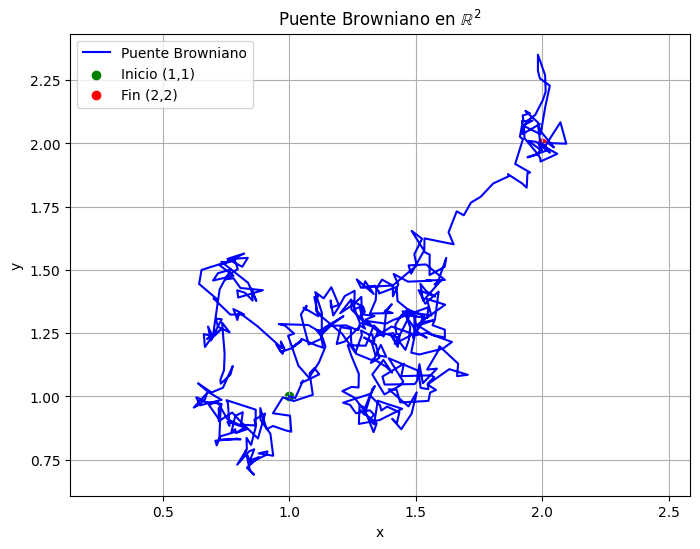

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)
T = 1.0          # tiempo final
N = 500          # número de pasos
dt = T / N       # tamaño del paso
t = np.linspace(0, T, N+1)

# Puntos inicial y final
x0 = np.array([1.0, 1.0])
xT = np.array([2.0, 2.0])

# Simulación de Browniano estándar en R2
dW = np.random.normal(0, np.sqrt(dt), size=(N, 2))  # incrementos
W = np.vstack([np.zeros(2), np.cumsum(dW, axis=0)])  # proceso Browniano

# Construcción del puente
bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(bridge[:, 0], bridge[:, 1], label='Puente Browniano', color='blue')
plt.scatter(*x0, color='green', label='Inicio (1,1)')
plt.scatter(*xT, color='red', label='Fin (2,2)')
plt.title('Puente Browniano en $\mathbb{R}^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


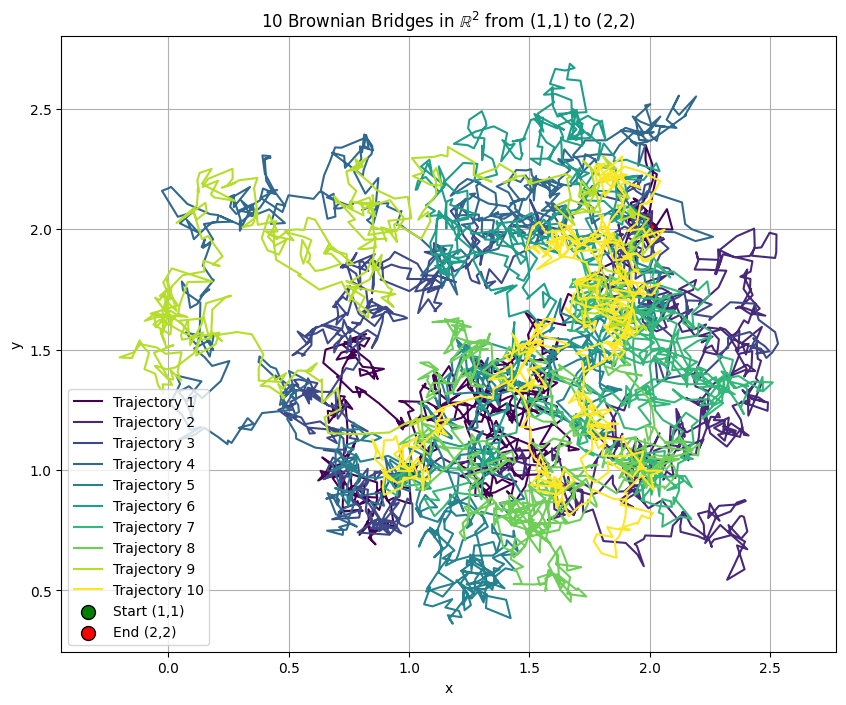

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
T = 1.0          # total time
N = 500          # number of steps
M = 10           # number of trajectories
dt = T / N
t = np.linspace(0, T, N+1)

# Starting and ending points
x0 = np.array([1.0, 1.0])
xT = np.array([2.0, 2.0])

# Create figure
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, M))  # color palette

for i in range(M):
    # Simulate W in R^2
    dW = np.random.normal(0, np.sqrt(dt), size=(N, 2))
    W = np.vstack([np.zeros(2), np.cumsum(dW, axis=0)])

    # Construct the Brownian bridge
    bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

    # Plot trajectory
    plt.plot(bridge[:, 0], bridge[:, 1], color=colors[i], label=f'Trajectory {i+1}')

# Mark start and end points
plt.scatter(*x0, color='green', s=100, label='Start (1,1)', edgecolor='black')
plt.scatter(*xT, color='red', s=100, label='End (2,2)', edgecolor='black')

# Decoration
plt.title(f'{M} Brownian Bridges in $\mathbb{{R}}^2$ from (1,1) to (2,2)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


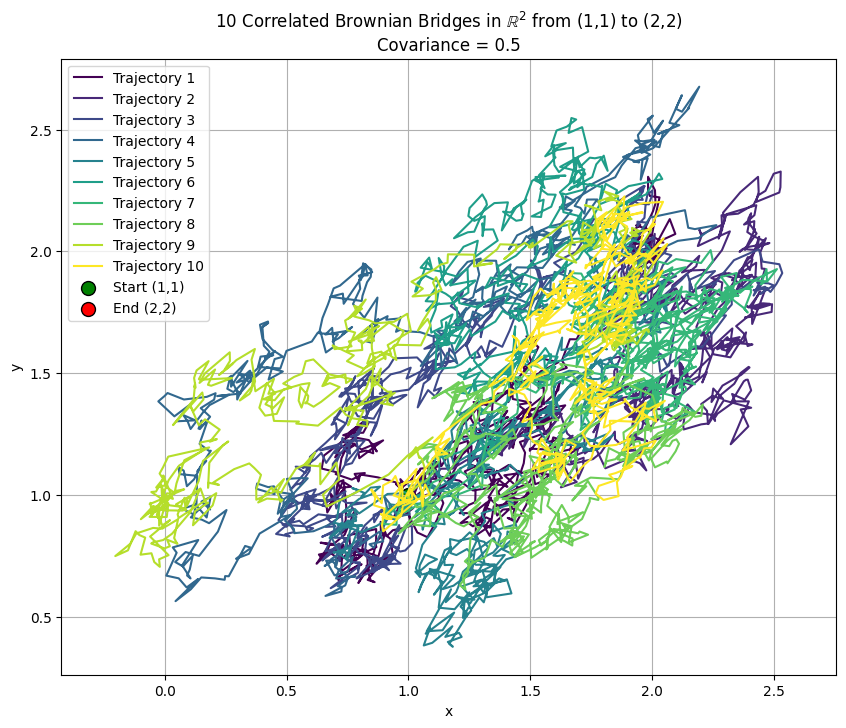

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
T = 1.0          # total time
N = 500          # number of steps
M = 10           # number of trajectories
dt = T / N
t = np.linspace(0, T, N+1)

# Starting and ending points
x0 = np.array([1.0, 1.0])
xT = np.array([2.0, 2.0])

# Covariance matrix and Cholesky decomposition
Sigma = np.array([[1.0, 0.5], [0.5, 1.0]])
L = np.linalg.cholesky(Sigma)

# Create figure
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, M))  # color palette

for i in range(M):
    # Simulate correlated Brownian increments in R^2
    dZ = np.random.normal(0, np.sqrt(dt), size=(N, 2))  # standard increments
    dW = dZ @ L.T  # apply Cholesky to induce correlation

    W = np.vstack([np.zeros(2), np.cumsum(dW, axis=0)])

    # Construct the Brownian bridge
    bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

    # Plot trajectory
    plt.plot(bridge[:, 0], bridge[:, 1], color=colors[i], label=f'Trajectory {i+1}')

# Mark start and end points
plt.scatter(*x0, color='green', s=100, label='Start (1,1)', edgecolor='black')
plt.scatter(*xT, color='red', s=100, label='End (2,2)', edgecolor='black')

# Decoration
plt.title(f'{M} Correlated Brownian Bridges in $\mathbb{{R}}^2$ from (1,1) to (2,2)\nCovariance = 0.5')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


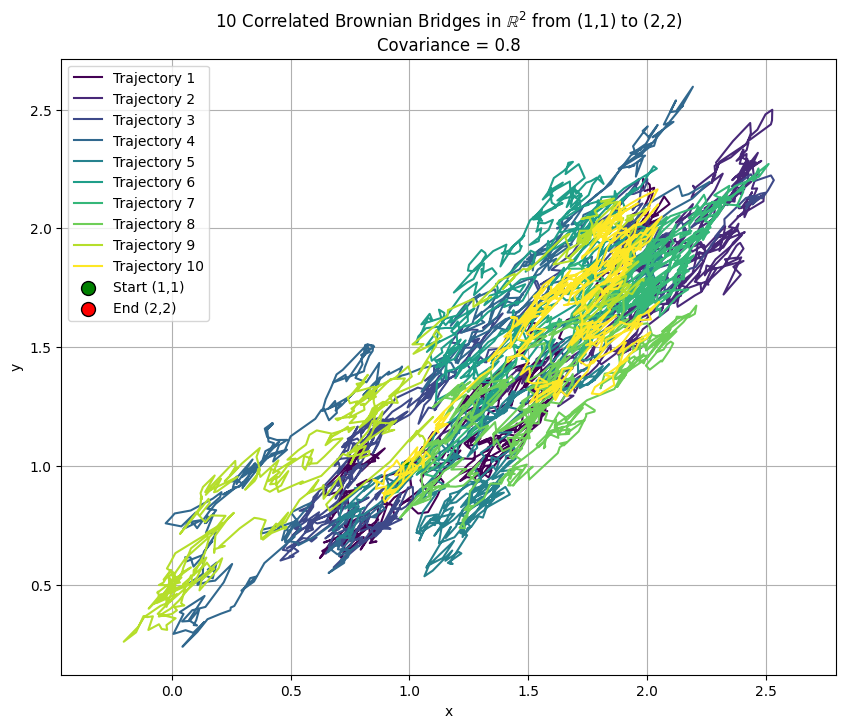

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
T = 1.0          # total time
N = 500          # number of steps
M = 10           # number of trajectories
dt = T / N
t = np.linspace(0, T, N+1)

# Starting and ending points
x0 = np.array([1.0, 1.0])
xT = np.array([2.0, 2.0])

# Covariance matrix and Cholesky decomposition
Sigma = np.array([[1.0, 0.8], [0.8, 1.0]])
L = np.linalg.cholesky(Sigma)

# Create figure
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, M))  # color palette

for i in range(M):
    # Simulate correlated Brownian increments in R^2
    dZ = np.random.normal(0, np.sqrt(dt), size=(N, 2))  # standard increments
    dW = dZ @ L.T  # apply Cholesky to induce correlation

    W = np.vstack([np.zeros(2), np.cumsum(dW, axis=0)])

    # Construct the Brownian bridge
    bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

    # Plot trajectory
    plt.plot(bridge[:, 0], bridge[:, 1], color=colors[i], label=f'Trajectory {i+1}')

# Mark start and end points
plt.scatter(*x0, color='green', s=100, label='Start (1,1)', edgecolor='black')
plt.scatter(*xT, color='red', s=100, label='End (2,2)', edgecolor='black')

# Decoration
plt.title(f'{M} Correlated Brownian Bridges in $\mathbb{{R}}^2$ from (1,1) to (2,2)\nCovariance = 0.8')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


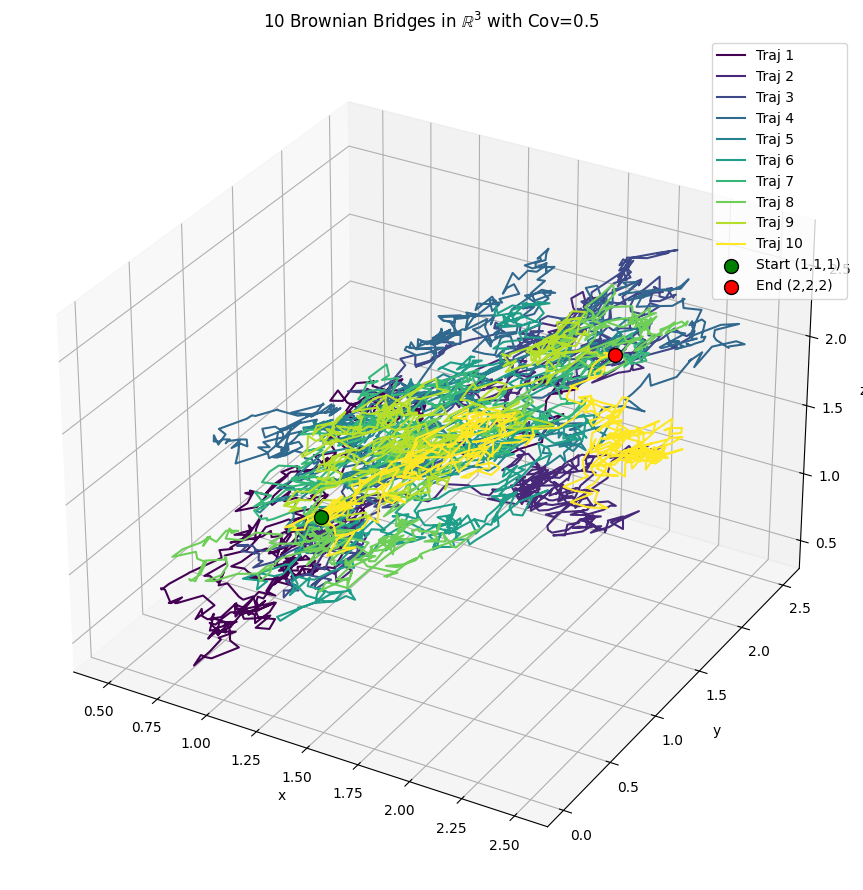

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
np.random.seed(42)
T = 1.0          # total time
N = 500          # number of steps
M = 10           # number of trajectories
dt = T / N
t = np.linspace(0, T, N+1)

# Start and end points in R^3
x0 = np.array([1.0, 1.0, 1.0])
xT = np.array([2.0, 2.0, 2.0])

# Covariance matrix (symmetric, positive-definite)
Sigma = np.array([
    [1.0, 0.5, 0.5],
    [0.5, 1.0, 0.5],
    [0.5, 0.5, 1.0]
])
L = np.linalg.cholesky(Sigma)

# Create 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, M))

for i in range(M):
    # Generate correlated Brownian increments in R^3
    dZ = np.random.normal(0, np.sqrt(dt), size=(N, 3))
    dW = dZ @ L.T
    W = np.vstack([np.zeros(3), np.cumsum(dW, axis=0)])

    # Construct the Brownian bridge
    bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

    # Plot trajectory in 3D
    ax.plot(bridge[:, 0], bridge[:, 1], bridge[:, 2], color=colors[i], label=f'Traj {i+1}')

# Mark start and end
ax.scatter(*x0, color='green', s=100, label='Start (1,1,1)', edgecolor='black')
ax.scatter(*xT, color='red', s=100, label='End (2,2,2)', edgecolor='black')

# Labels and decoration
ax.set_title(f'{M} Brownian Bridges in $\mathbb{{R}}^3$ with Cov=0.5')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.tight_layout()
plt.show()


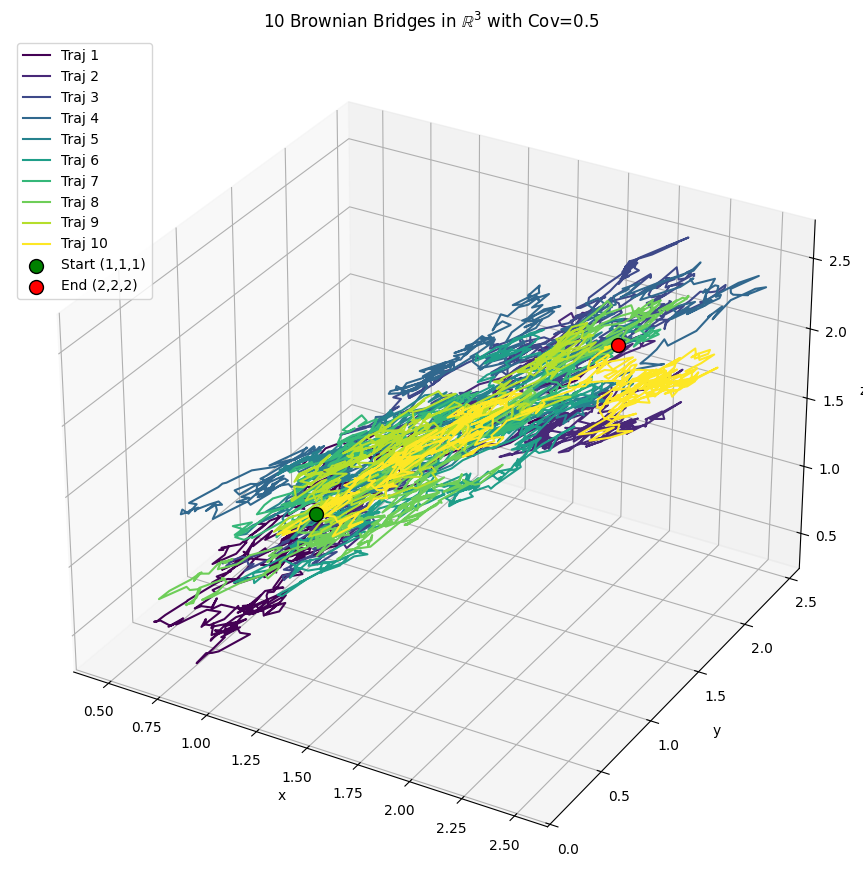

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
np.random.seed(42)
T = 1.0          # total time
N = 500          # number of steps
M = 10           # number of trajectories
dt = T / N
t = np.linspace(0, T, N+1)

# Start and end points in R^3
x0 = np.array([1.0, 1.0, 1.0])
xT = np.array([2.0, 2.0, 2.0])

# Covariance matrix (symmetric, positive-definite)
Sigma = np.array([
    [1.0, 0.8, 0.8],
    [0.8, 1.0, 0.8],
    [0.8, 0.8, 1.0]
])
L = np.linalg.cholesky(Sigma)

# Create 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, M))

for i in range(M):
    # Generate correlated Brownian increments in R^3
    dZ = np.random.normal(0, np.sqrt(dt), size=(N, 3))
    dW = dZ @ L.T
    W = np.vstack([np.zeros(3), np.cumsum(dW, axis=0)])

    # Construct the Brownian bridge
    bridge = x0 + W + (t[:, None]) * (xT - x0 - W[-1])

    # Plot trajectory in 3D
    ax.plot(bridge[:, 0], bridge[:, 1], bridge[:, 2], color=colors[i], label=f'Traj {i+1}')

# Mark start and end
ax.scatter(*x0, color='green', s=100, label='Start (1,1,1)', edgecolor='black')
ax.scatter(*xT, color='red', s=100, label='End (2,2,2)', edgecolor='black')

# Labels and decoration
ax.set_title(f'{M} Brownian Bridges in $\mathbb{{R}}^3$ with Cov=0.5')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.tight_layout()
plt.show()

## Inferencia Bayesiana para la Matriz de Covarianza en una Distribución Normal Bivariante

### 1. Modelo del problema

Se asume que los datos \( \mathbf{X}_1, \dots, \mathbf{X}_n \in \mathbb{R}^2 \) son realizaciones independientes de una distribución normal bivariante con media cero y matriz de covarianza desconocida \( \Sigma \):

$$
\mathbf{X}_i \sim \mathcal{N}_2(\mathbf{0}, \Sigma), \quad i = 1, \dots, n
$$

El objetivo es inferir la matriz de covarianza \( \Sigma \), en particular la correlación entre las dos componentes.

---

### 2. Distribución a priori: Inversa-Wishart

Se especifica una distribución a priori para \( \Sigma \) como una **Inversa-Wishart**, que es una elección conjugada para la matriz de covarianza en modelos normales multivariantes:

$$
\Sigma \sim \mathcal{IW}(\Psi_0, \nu_0)
$$

donde:
- \( \Psi_0 \in \mathbb{R}^{2 \times 2} \) es la matriz de escala,
- \( \nu_0 > d-1 \) (con \( d = 2 \)) es el número de grados de libertad.

La esperanza a priori de \( \Sigma \), si \( \nu_0 > d+1 \), es:

$$
\mathbb{E}[\Sigma] = \frac{\Psi_0}{\nu_0 - d - 1}
$$

---

### 3. Posterior bayesiana

Dado un conjunto de datos \( \{\mathbf{X}_1, \dots, \mathbf{X}_n\} \), la distribución posterior también es Inversa-Wishart:

$$
\Sigma \mid \mathbf{X} \sim \mathcal{IW}(\Psi_n, \nu_n)
$$

con:

$$
\Psi_n = \Psi_0 + \sum_{i=1}^n \mathbf{X}_i \mathbf{X}_i^\top, \quad \nu_n = \nu_0 + n
$$

La esperanza posterior de \( \Sigma \) es:

$$
\mathbb{E}[\Sigma \mid \mathbf{X}] = \frac{\Psi_n}{\nu_n - d - 1}
$$

Esta matriz se encuentra "entre" la matriz de covarianza empírica y la expectativa a priori.

---

### 4. Estimación de la correlación posterior

Para cada simulación \( \Sigma^{(s)} \sim \mathcal{IW}(\Psi_n, \nu_n) \), se calcula la correlación correspondiente:

$$
\rho^{(s)} = \frac{\Sigma_{12}^{(s)}}{\sqrt{\Sigma_{11}^{(s)} \Sigma_{22}^{(s)}}}
$$

Repitiendo este proceso muchas veces se obtiene una muestra de la **distribución posterior de la correlación**, la cual se puede visualizar como un histograma y comparar con la correlación verdadera y la empírica.

---

### 5. Conclusión

Este enfoque bayesiano permite combinar información a priori con los datos observados para obtener una inferencia robusta sobre la matriz de covarianza y la correlación. La distribución posterior refleja la incertidumbre restante después de observar los datos y puede usarse para construir intervalos de credibilidad.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, cholesky
from scipy.stats import wishart, multivariate_normal

np.random.seed(42)

# Parámetros verdaderos
n = 100
p = 2
mu_true = np.array([0, 1])
Sigma_true = np.array([[1.0, 0.5],
                       [0.5, 2.0]])

# Datos simulados
Y = np.random.multivariate_normal(mu_true, Sigma_true, size=n)

# Priori
mu0 = np.zeros(p)
kappa0 = 0.01
nu0 = p + 2
Lambda0 = np.eye(p)

# Inicialización
n_iter = 5000
mu_samples = np.zeros((n_iter, p))
Sigma_samples = np.zeros((n_iter, p, p))

# Función para muestrear de la Inversa-Wishart
def rinvwishart(df, scale):
    W = wishart.rvs(df=df, scale=inv(scale))
    return inv(W)

# Precalcular
Y_bar = np.mean(Y, axis=0)
S = np.dot((Y - Y_bar).T, Y - Y_bar)

# Inicializar mu
mu = Y_bar.copy()

# Gibbs Sampling
for t in range(n_iter):
    kappa_n = kappa0 + n
    nu_n = nu0 + n
    mu_n = (kappa0 * mu0 + n * Y_bar) / kappa_n
    diff = (Y_bar - mu0).reshape(-1, 1)
    Lambda_n = Lambda0 + S + (kappa0 * n / kappa_n) * np.dot(diff, diff.T)

    # Muestrear Sigma
    Sigma = rinvwishart(nu_n, Lambda_n)
    Sigma_samples[t] = Sigma

    # Muestrear mu dado Sigma
    mu = np.random.multivariate_normal(mu_n, Sigma / kappa_n)
    mu_samples[t] = mu


Covarianza verdadera:
 [[1.  0.8]
 [0.8 1.5]]
Media a priori:
 [[1. 0.]
 [0. 1.]]
Media de la muestra:
 [[1.460541   1.10608347]
 [1.10608347 1.76961976]]
Media posterior:
 [[1.45151079 1.08439556]
 [1.08439556 1.75452918]]


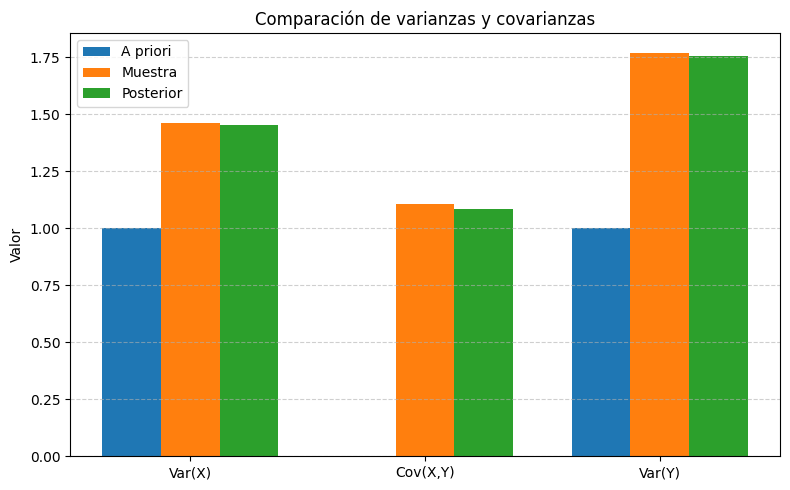

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar datos simulados
np.random.seed(123)

# Matriz de covarianza verdadera
Sigma_true = np.array([[1.0, 0.8],
                       [0.8, 1.5]])

n = 50
mu = np.array([0.0, 0.0])
X = np.random.multivariate_normal(mu, Sigma_true, size=n)

# Paso 2: A priori Inversa-Wishart
nu0 = 4  # grados de libertad > d-1 (aquí d=2)
Psi0 = np.eye(2)  # matriz identidad

# Paso 3: Calcular S_n (matriz de sumas de cuadrados)
Sn = X.T @ X

# Paso 4: Posterior
nu_n = nu0 + n
Psi_n = Psi0 + Sn

# Paso 5: Medias de la matriz de covarianza

# Media de una Inversa-Wishart:
# E[Σ | datos] = Psi_n / (nu_n - d - 1), si nu_n > d + 1
d = 2
Sigma_post_mean = Psi_n / (nu_n - d - 1)

# Media empírica (muestra): Sn / n
Sigma_sample = Sn / n

# Media a priori: Psi0 / (nu0 - d - 1)
Sigma_prior_mean = Psi0 / (nu0 - d - 1)

# Paso 6: Mostrar resultados
print("Covarianza verdadera:\n", Sigma_true)
print("Media a priori:\n", Sigma_prior_mean)
print("Media de la muestra:\n", Sigma_sample)
print("Media posterior:\n", Sigma_post_mean)

# Paso 7: Graficar las matrices
labels = ['Var(X)', 'Cov(X,Y)', 'Var(Y)']
prior_vals = [Sigma_prior_mean[0,0], Sigma_prior_mean[0,1], Sigma_prior_mean[1,1]]
sample_vals = [Sigma_sample[0,0], Sigma_sample[0,1], Sigma_sample[1,1]]
posterior_vals = [Sigma_post_mean[0,0], Sigma_post_mean[0,1], Sigma_post_mean[1,1]]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, prior_vals, width, label='A priori')
plt.bar(x, sample_vals, width, label='Muestra')
plt.bar(x + width, posterior_vals, width, label='Posterior')

plt.xticks(x, labels)
plt.ylabel("Valor")
plt.title("Comparación de varianzas y covarianzas")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



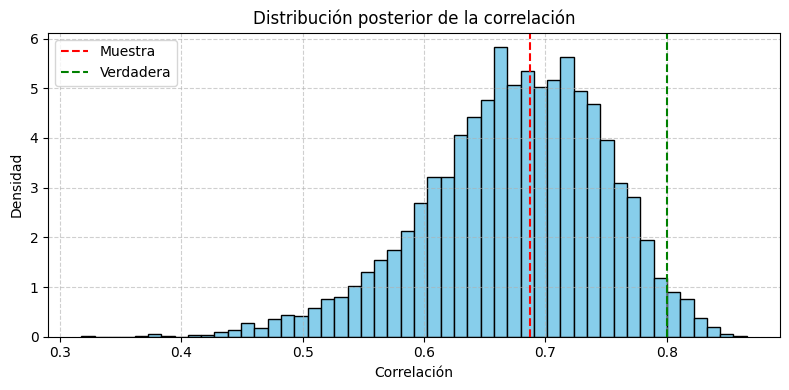

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart

# Parámetros base
np.random.seed(123)
Sigma_true = np.array([[1.0, 0.8],
                       [0.8, 1.5]])
n = 50
mu = np.zeros(2)
X = np.random.multivariate_normal(mu, Sigma_true, size=n)

# Priori Inversa-Wishart
nu0 = 4
Psi0 = np.eye(2)
d = 2

# S_n: sumas de cuadrados
Sn = X.T @ X

# Parámetros de la posterior
nu_n = nu0 + n
Psi_n = Psi0 + Sn

# Simulación desde la posterior Inversa-Wishart
n_sims = 5000
posterior_covs = invwishart.rvs(df=nu_n, scale=Psi_n, size=n_sims)

# Asegurar que las matrices simuladas están bien estructuradas (3D)
posterior_covs = np.array(posterior_covs)
if posterior_covs.ndim == 2:
    posterior_covs = posterior_covs[np.newaxis, :, :]

# Transformar a correlaciones
posterior_corrs = []
for cov in posterior_covs:
    stds = np.sqrt(np.diag(cov))
    corr = cov[0, 1] / (stds[0] * stds[1])
    posterior_corrs.append(corr)

posterior_corrs = np.array(posterior_corrs)

# Graficar distribución posterior de la correlación
plt.figure(figsize=(8, 4))
plt.hist(posterior_corrs, bins=50, color='skyblue', edgecolor='k', density=True)
plt.axvline(np.corrcoef(X.T)[0, 1], color='red', linestyle='--', label='Muestra')
plt.axvline(0.8, color='green', linestyle='--', label='Verdadera')
plt.title('Distribución posterior de la correlación')
plt.xlabel('Correlación')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


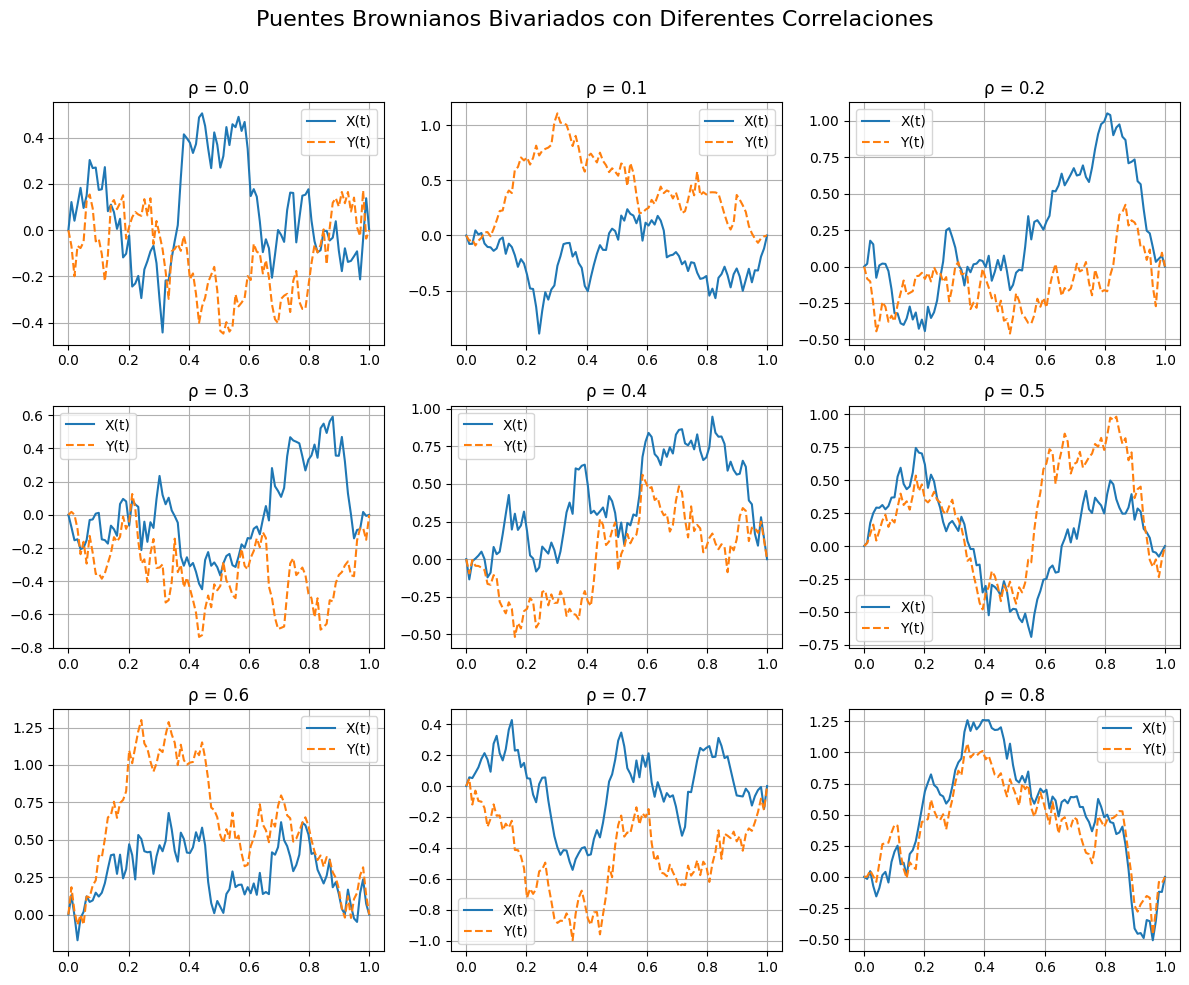

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular un puente Browniano bivariado con correlación específica
def simulate_bivariate_brownian_bridge(n_steps=100, rho=0.0):
    t = np.linspace(0, 1, n_steps)
    dt = t[1] - t[0]

    # Covarianza con varianza 1 y correlación rho
    cov = np.array([[1, rho],
                    [rho, 1]]) * dt

    # Simulación de proceso Browniano estándar
    dW = np.random.multivariate_normal([0, 0], cov, size=n_steps - 1)
    W = np.vstack((np.zeros(2), np.cumsum(dW, axis=0)))

    # Transformar en puente Browniano: B_t - t * B_1
    bridge = W - np.outer(t, W[-1])

    return t, bridge

# Correlaciones de 0.0 a 0.8 en 9 pasos
rhos = np.linspace(0.0, 0.8, 9)

# Graficar grilla de simulaciones
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("Puentes Brownianos Bivariados con Diferentes Correlaciones", fontsize=16)

for ax, rho in zip(axes.flatten(), rhos):
    t, bridge = simulate_bivariate_brownian_bridge(rho=rho)
    ax.plot(t, bridge[:, 0], label='X(t)')
    ax.plot(t, bridge[:, 1], label='Y(t)', linestyle='--')
    ax.set_title(f"ρ = {rho:.1f}")
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Fundamento Teórico: Puente Browniano Bivariado y Correlación

### Proceso Browniano Bivariado

Un **proceso Browniano bivariado** \( \mathbf{W}_t = (X_t, Y_t)^\top \) con correlación \( \rho \in [-1, 1] \) tiene incrementos gaussianos definidos por:

$$
\Delta \mathbf{W}_t = \mathbf{W}_{t + \Delta t} - \mathbf{W}_t \sim \mathcal{N}_2\left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \Delta t \cdot \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix} \right)
$$

Este modelo permite controlar el grado de dependencia lineal entre los componentes \( X_t \) y \( Y_t \) del proceso.

---

### Puente Browniano

El **puente Browniano bivariado** es una versión del proceso Browniano condicionado a terminar en el origen en \( t = 1 \), es decir:

$$
\mathbf{B}_t = \mathbf{W}_t - t \cdot \mathbf{W}_1
$$

donde \( \mathbf{W}_1 \) es la posición final del Browniano estándar. Por construcción:

$$
\mathbf{B}_0 = \mathbf{B}_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

Este proceso tiene las mismas propiedades locales que el Browniano, pero está forzado a volver al origen al final del intervalo.

---

### Efecto de la Correlación

La correlación \( \rho \) determina la **forma conjunta** de las trayectorias de \( X_t \) y \( Y_t \):

- **Si \( \rho = 0 \)**:
  - Los procesos \( X_t \) y \( Y_t \) son independientes.
  - Sus trayectorias no muestran relación sistemática.
  - En el plano \( (X_t, Y_t) \), los puntos se distribuyen ampliamente en forma circular.

- **Si \( \rho > 0 \)**:
  - Existe dependencia positiva: si \( X_t \) sube, es más probable que \( Y_t \) también suba.
  - Las trayectorias tienden a alinearse.
  - En el plano \( (X_t, Y_t) \), las curvas se agrupan cerca de la diagonal \( Y = X \).

- **Si \( \rho \to 1 \)**:
  - Las trayectorias se vuelven casi idénticas.
  - El gráfico \( X(t) \) vs \( Y(t) \) se convierte en una línea muy cercana a \( Y = X \).

---

### Visualización

En las simulaciones, se observa que:

- Con **correlación baja**, las trayectorias son caóticas e independientes entre sí.
- Con **correlación alta**, las trayectorias siguen patrones similares y se "mueven juntas".
- La estructura del puente Browniano hace que todas las trayectorias comiencen y terminen en el origen, pero la correlación controla el "camino" que siguen en medio.

---


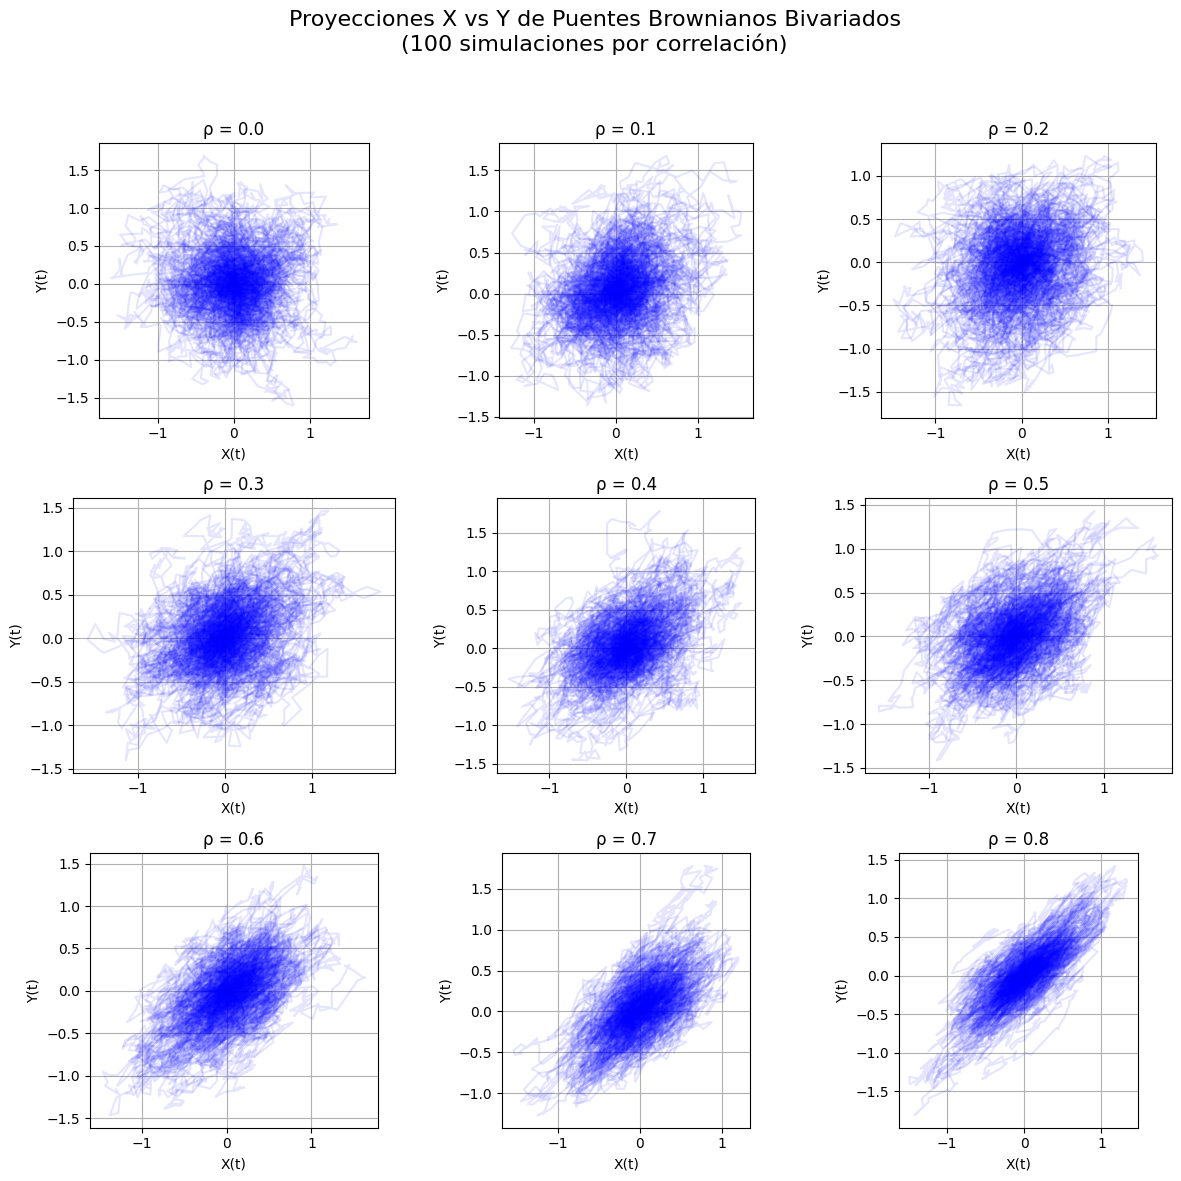

In [ ]:
# Simular 100 trayectorias por correlación y graficar X vs Y en el plano

# Parámetros de simulación
n_steps = 100
n_simulations = 100
rhos = np.linspace(0.0, 0.8, 9)

# Crear figura
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle("Proyecciones X vs Y de Puentes Brownianos Bivariados\n(100 simulaciones por correlación)", fontsize=16)

# Simulación y gráfico
for ax, rho in zip(axes.flatten(), rhos):
    for _ in range(n_simulations):
        _, bridge = simulate_bivariate_brownian_bridge(n_steps=n_steps, rho=rho)
        ax.plot(bridge[:, 0], bridge[:, 1], alpha=0.1, color='blue')  # Trazo con transparencia
    ax.set_title(f"ρ = {rho:.1f}")
    ax.set_xlabel("X(t)")
    ax.set_ylabel("Y(t)")
    ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## La Inversa-Wishart como distribución conjugada para la matriz de covarianzas

Consideremos que tenemos datos \( \mathbf{X}_1, \dots, \mathbf{X}_n \in \mathbb{R}^d \) distribuidos según una normal multivariada con media conocida \( \mu \) (puede ser \( \mu = 0 \)) y matriz de covarianzas desconocida \( \Sigma \):

$$
\mathbf{X}_i \sim \mathcal{N}_d(\mu, \Sigma)
$$

Queremos encontrar una distribución a posteriori para \( \Sigma \), y usaremos como prior:

$$
\Sigma \sim \mathcal{IW}(\Psi_0, \nu_0)
$$

La distribución **Inversa-Wishart** es conjugada en este caso. Veamos por qué.

---

### Núcleo de la verosimilitud

La verosimilitud conjunta (suponiendo \( \mu = 0 \) para simplificar) es:

$$
p(\mathbf{X}_1, \dots, \mathbf{X}_n \mid \Sigma) \propto |\Sigma|^{-\frac{n}{2}} \exp\left(-\frac{1}{2} \sum_{i=1}^n \mathbf{X}_i^\top \Sigma^{-1} \mathbf{X}_i \right)
$$

Definiendo:

$$
S = \sum_{i=1}^n \mathbf{X}_i \mathbf{X}_i^\top
$$

la verosimilitud se puede reescribir como:

$$
\propto |\Sigma|^{-\frac{n}{2}} \exp\left(-\frac{1}{2} \operatorname{tr}(\Sigma^{-1} S) \right)
$$

---

### Núcleo de la prior Inversa-Wishart

La densidad de la Inversa-Wishart es, en su núcleo:

$$
p(\Sigma) \propto |\Sigma|^{-\frac{\nu_0 + d + 1}{2}} \exp\left( -\frac{1}{2} \operatorname{tr}(\Psi_0 \Sigma^{-1}) \right)
$$

---

### Producto: verosimilitud × prior

Multiplicando ambos núcleos:

$$
p(\Sigma \mid \mathbf{X}) \propto |\Sigma|^{-\frac{n + \nu_0 + d + 1}{2}} \exp\left( -\frac{1}{2} \operatorname{tr}\left((\Psi_0 + S) \Sigma^{-1}\right) \right)
$$

Esto tiene **la misma forma** que el núcleo de una distribución Inversa-Wishart:

$$
\Sigma \mid \mathbf{X} \sim \mathcal{IW}(\Psi_0 + S, \nu_0 + n)
$$

---

### Conclusión

La Inversa-Wishart es **conjugada** para \( \Sigma \) en el modelo normal multivariado con media conocida, ya que la posterior resulta ser también una Inversa-Wishart con parámetros actualizados:

- Matriz de escala: \( \Psi_n = \Psi_0 + S \)
- Grados de libertad: \( \nu_n = \nu_0 + n \)



## Demostración: La esperanza posterior como promedio ponderado

Consideramos un modelo con:

- \( \mathbf{X}_1, \dots, \mathbf{X}_n \sim \mathcal{N}_d(0, \Sigma) \)
- Prior: \( \Sigma \sim \mathcal{IW}(\Psi_0, \nu_0) \)

La posterior es:

$$
\Sigma \mid \mathbf{X} \sim \mathcal{IW}(\Psi_n, \nu_n)
$$

donde:

$$
\Psi_n = \Psi_0 + S, \quad \nu_n = \nu_0 + n
$$

y:

$$
S = \sum_{i=1}^n \mathbf{X}_i \mathbf{X}_i^\top
$$

---

### Esperanza de la Inversa-Wishart

Si \( \nu_n > d + 1 \), la esperanza de la distribución Inversa-Wishart es:

$$
\mathbb{E}[\Sigma \mid \mathbf{X}] = \frac{\Psi_n}{\nu_n - d - 1} = \frac{\Psi_0 + S}{\nu_0 + n - d - 1}
$$

Queremos expresar esto como un promedio ponderado entre:

- \( \mathbb{E}[\Sigma]_{\text{prior}} = \frac{\Psi_0}{\nu_0 - d - 1} \)
- \( \Sigma_{\text{muestra}} = \frac{S}{n} \)

---

### Paso intermedio: reescribir la esperanza posterior

Multiplicamos y dividimos para igualar denominadores:

$$
\mathbb{E}[\Sigma \mid \mathbf{X}] = \frac{\nu_0 - d - 1}{\nu_n - d - 1} \cdot \frac{\Psi_0}{\nu_0 - d - 1} + \frac{n}{\nu_n - d - 1} \cdot \frac{S}{n}
$$

Es decir:

$$
\mathbb{E}[\Sigma \mid \mathbf{X}] = w_{\text{prior}} \cdot \mathbb{E}[\Sigma]_{\text{prior}} + w_{\text{data}} \cdot \Sigma_{\text{muestra}}
$$

con:

$$
w_{\text{prior}} = \frac{\nu_0 - d - 1}{\nu_n - d - 1}, \quad w_{\text{data}} = \frac{n}{\nu_n - d - 1}
$$

---

### Conclusión

La **esperanza posterior** de la matriz de varianzas y covarianzas es un **promedio ponderado** entre:

- la **matriz a priori**: \( \mathbb{E}[\Sigma]_{\text{prior}} \),
- y la **matriz muestral**: \( \Sigma_{\text{muestra}} = \frac{S}{n} \),

con pesos que dependen de los grados de libertad \( \nu_0 \), el número de observaciones \(n\), y la dimensión \(d\):

$$
\mathbb{E}[\Sigma \mid \mathbf{X}] = \underbrace{\left( \frac{\nu_0 - d - 1}{\nu_0 + n - d - 1} \right)}_{\text{peso priori}} \cdot \mathbb{E}[\Sigma]_{\text{prior}} + \underbrace{\left( \frac{n}{\nu_0 + n - d - 1} \right)}_{\text{peso muestra}} \cdot \Sigma_{\text{muestra}}
$$

Esto muestra claramente cómo la inferencia bayesiana balancea información previa y datos observados.


## Objetivo: Contraste de Esfericidad

Queremos contrastar la hipótesis nula:

$$
H_0: \Sigma = \sigma^2 I_d \quad \text{(matriz esférica)}
$$

vs. la alternativa general:

$$
H_1: \Sigma \neq \sigma^2 I_d
$$

donde \( \Sigma \in \mathbb{R}^{d \times d} \) es la matriz de varianzas y covarianzas de una muestra:

$$
\mathbf{X}_1, \dots, \mathbf{X}_n \sim \mathcal{N}_d(\mathbf{0}, \Sigma)
$$

---

## Paso 1: Núcleo de la verosimilitud

La verosimilitud (ignorando constantes) de \( \Sigma \) es:

$$
L(\Sigma) \propto |\Sigma|^{-n/2} \exp\left( -\frac{1}{2} \sum_{i=1}^n \mathbf{X}_i^\top \Sigma^{-1} \mathbf{X}_i \right)
$$

Definimos la matriz de sumas de cuadrados:

$$
S = \sum_{i=1}^n \mathbf{X}_i \mathbf{X}_i^\top
$$

entonces:

$$
L(\Sigma) \propto |\Sigma|^{-n/2} \exp\left( -\frac{1}{2} \operatorname{tr}(\Sigma^{-1} S) \right)
$$

---

##  Bajo \( H_1 \): MLE general

La estimación de máxima verosimilitud (MLE) de \( \Sigma \) sin restricciones es:

$$
\hat{\Sigma}_{H_1} = \frac{1}{n} S
$$

Entonces, el valor máximo de la verosimilitud bajo \( H_1 \) es:

$$
L_{H_1}^{\max} \propto |\hat{\Sigma}_{H_1}|^{-n/2} \exp\left( -\frac{nd}{2} \right)
$$

---

##  Bajo \( H_0 \): Esfericidad

Se impone la restricción \( \Sigma = \sigma^2 I_d \). La MLE de \( \sigma^2 \) es:

$$
\hat{\sigma}^2 = \frac{1}{nd} \operatorname{tr}(S)
$$

La verosimilitud bajo \( H_0 \) es:

$$
L_{H_0}^{\max} \propto (\hat{\sigma}^2)^{-nd/2} \exp\left( -\frac{nd}{2} \right)
$$

---

## 🧪 Estadístico de Razón de Verosimilitud

El estadístico es:

$$
\Lambda = \frac{L_{H_0}^{\max}}{L_{H_1}^{\max}} = \left( \frac{|\hat{\Sigma}_{H_1}|}{(\hat{\sigma}^2)^d} \right)^{-n/2}
$$

Tomando logaritmo y multiplicando por \(-2\):

$$
-2 \log \Lambda = n \log \left( \frac{|\hat{\Sigma}_{H_1}|}{\left( \frac{1}{d} \operatorname{tr}(\hat{\Sigma}_{H_1}) \right)^d} \right)
$$

Este valor es **cero** si \( \hat{\Sigma} \) es proporcional a la identidad, y crece con la **no-esfericidad**.

---

##  Distribución bajo \( H_0 \)

Bajo la hipótesis nula \( H_0: \Sigma = \sigma^2 I_d \), se tiene:

$$
S \sim \sigma^2 \cdot \mathcal{W}_d(n, I_d)
$$

La razón entre el determinante y la traza al cubo:

$$
\frac{|\hat{\Sigma}|}{\left( \frac{1}{d} \operatorname{tr}(\hat{\Sigma}) \right)^d}
$$

es invariante a escala y resume cuán lejos está la muestra de ser esférica.

---

## Aplicación del Lema de Neyman-Pearson

El **lema de Neyman-Pearson** establece que, para dos hipótesis simples:

$$
H_0: \theta = \theta_0 \quad \text{vs.} \quad H_1: \theta = \theta_1
$$

el test más potente al nivel \( \alpha \) es aquel que rechaza \( H_0 \) cuando:

$$
\frac{L(\theta_1)}{L(\theta_0)} > c_\alpha
$$

En nuestro caso:

- \( H_0: \Sigma = \sigma^2 I_d \)
- \( H_1: \Sigma \) arbitraria

Por tanto, el test basado en la **razón de verosimilitud** es el **más potente invariante** (por teoría de grupos de invariancia) y es óptimo en este contexto.

---

## Conclusión

El test de esfericidad mediante la razón de verosimilitud:

- Contrasta si la matriz de covarianzas es proporcional a la identidad.
- Utiliza la distribución de **Wishart** bajo \( H_0 \).
- Es un test **óptimo** según el **lema de Neyman-Pearson**.
- El estadístico:

$$
T = n \log \left( \frac{|\hat{\Sigma}|}{\left( \frac{1}{d} \operatorname{tr}(\hat{\Sigma}) \right)^d} \right)
$$

crece a medida que la matriz se aleja de la esfericidad, y puede contrastarse con una distribución asintótica (por ejemplo, \( \chi^2 \) con \( \frac{1}{2}(d-1)(d+2) \) grados de libertad).



### Multivariate Fourier Series Representation

We consider a vector-valued trajectory (or multivariate function):

$$
\mathbf{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_p(t)
\end{bmatrix}, \quad t \in [0,1],
$$

where each component function $x_j(t)$ is assumed to be smooth and (optionally) periodic.

Each component can be approximated using a truncated Fourier basis expansion:

$$
x_j(t) \approx a_{j,0} + \sum_{k=1}^K \left[ a_{j,k} \cos(2\pi k t) + b_{j,k} \sin(2\pi k t) \right]
$$

Therefore, the entire multivariate trajectory can be written as:

$$
\mathbf{x}(t) \approx \mathbf{a}_0 + \sum_{k=1}^K \left[ \mathbf{a}_k \cos(2\pi k t) + \mathbf{b}_k \sin(2\pi k t) \right]
$$

where:
- $\mathbf{a}_0, \mathbf{a}_k, \mathbf{b}_k \in \mathbb{R}^p$ are vectors of Fourier coefficients,
- $K$ is the number of harmonics used in the approximation.

This is called a **multivariate Fourier series** representation, since the same set of basis functions $\{\cos(2\pi k t), \sin(2\pi k t)\}$ is shared across all variables.

---

#### Why use a Fourier basis?

- **Smoothness**: Fourier series are ideal for representing smooth periodic signals.
- **Dimensionality reduction**: Only a few coefficients ($K$ terms) can capture most of the signal.
- **Shared temporal structure**: Useful when all components evolve over time with similar frequency behavior.

---

#### Limitations

- Not suitable for **non-periodic** functions unless properly extended (e.g., windowing or padding).
- Less effective when local behavior or discontinuities are present (use B-splines or wavelets instead).

---

#### Application

The multivariate Fourier representation is useful in:
- Functional data analysis (FDA),
- Time series modeling of multi-channel signals,
- Dimensionality reduction of multivariate trajectories,
- Simulation of smooth multi-output stochastic processes
### Multivariate Fourier Series Representation

We consider a vector-valued trajectory (or multivariate function):

$$
\mathbf{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_p(t)
\end{bmatrix}, \quad t \in [0,1],
$$

where each component function $x_j(t)$ is assumed to be smooth and (optionally) periodic.

Each component can be approximated using a truncated Fourier basis expansion:

$$
x_j(t) \approx a_{j,0} + \sum_{k=1}^K \left[ a_{j,k} \cos(2\pi k t) + b_{j,k} \sin(2\pi k t) \right]
$$

Therefore, the entire multivariate trajectory can be written as:

$$
\mathbf{x}(t) \approx \mathbf{a}_0 + \sum_{k=1}^K \left[ \mathbf{a}_k \cos(2\pi k t) + \mathbf{b}_k \sin(2\pi k t) \right]
$$

where:
- $\mathbf{a}_0, \mathbf{a}_k, \mathbf{b}_k \in \mathbb{R}^p$ are vectors of Fourier coefficients,
- $K$ is the number of harmonics used in the approximation.

This is called a **multivariate Fourier series** representation, since the same set of basis functions $\{\cos(2\pi k t), \sin(2\pi k t)\}$ is shared across all variables.

---

#### Why use a Fourier basis?

- **Smoothness**: Fourier series are ideal for representing smooth periodic signals.
- **Dimensionality reduction**: Only a few coefficients ($K$ terms) can capture most of the signal.
- **Shared temporal structure**: Useful when all components evolve over time with similar frequency behavior.

---

#### Limitations

- Not suitable for **non-periodic** functions unless properly extended (e.g., windowing or padding).
- Less effective when local behavior or discontinuities are present (use B-splines or wavelets instead).

---

#### Application

The multivariate Fourier representation is useful in:
- Functional data analysis (FDA),
- Time series modeling of multi-channel signals,
- Dimensionality reduction of multivariate trajectories,
- Simulation of smooth multi-output stochastic processes


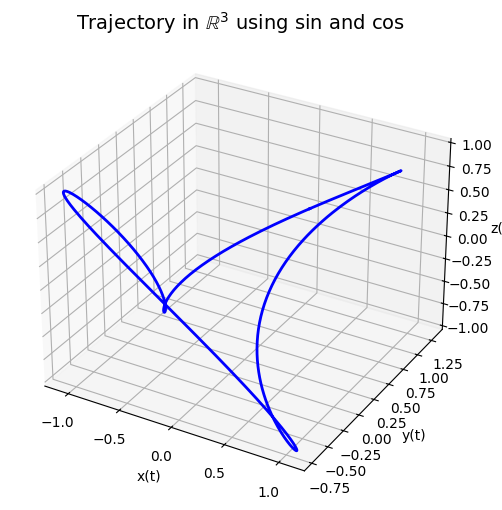

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dominio de tiempo
t = np.linspace(0, 2*np.pi, 500)

# Trayectoria en R^3 usando senos y cosenos
x = np.sin(t) + 0.5*np.sin(3*t)
y = np.cos(t) + 0.3*np.cos(2*t)
z = np.sin(2*t)

# Graficar en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', lw=2)
ax.set_title('Trajectory in $\\mathbb{R}^3$ using sin and cos', fontsize=14)
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.show()


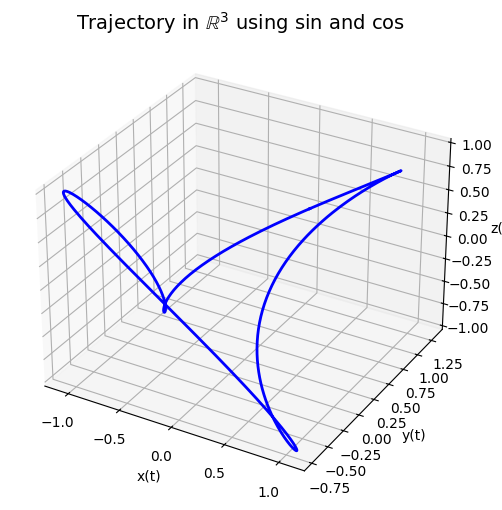

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dominio de tiempo
t = np.linspace(0, 2*np.pi, 500)

# Trayectoria en R^3 usando senos y cosenos
x = np.sin(t) + 0.5*np.sin(3*t)
y = np.cos(t) + 0.3*np.cos(2*t)
z = np.sin(2*t)

# Graficar en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', lw=2)
ax.set_title('Trajectory in $\\mathbb{R}^3$ using sin and cos', fontsize=14)
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.show()

